# Testing the change of RC Paramaters #

Starting out just import matplotlib, should be using the default pamameters, which can be checked using `mpl.rcParams.copy()`

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Default mpl rc parameters
mpl_default = mpl.rcParams.copy()

# And let's see if we can figure out what changed
def any_rc_changes(new, old=mpl_default):
    for key in new.keys():
        if new[key] != old[key]:
            print('{}:'.format(key))
            print('\tOld param:{}\n\tNew param:{}\n'.format(old[key], new[key]))

# And a counting function, because I'm lazy
def num_rc_changes(new, old=mpl_default):
    count = 0
    for key in new.keys():
        if new[key] != old[key]:
            count += 1
    return count

### Let's make some test data ###
Hard to beat the classic sine wave

In [3]:
xs = [x/1000 for x in range(10000)]
ys1 = [np.sin(x) for x in xs]
ys2 = [np.sin(x/2)/2 for x in xs]
ys3 = [np.sin(x*2)/5 for x in xs]


### Let's make a classic matplotlib graph ###

Nothing too fancy, fairly basic set up. 

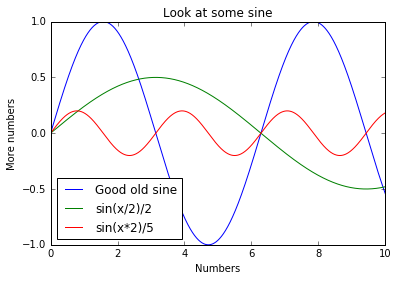

In [4]:
plt.plot(xs, ys1, label='Good old sine')
plt.plot(xs, ys2, label='sin(x/2)/2')
plt.plot(xs, ys3, label='sin(x*2)/5')

plt.xlabel("Numbers")
plt.ylabel("More numbers")
plt.title("Look at some sine")

plt.legend(loc=0)
plt.show()

There's the classic matplotlib settings we all know and vaguely tolerate

### Let's import Seaborn ###

On importing Seaborn, it [runs the `set` fucntion](https://github.com/mwaskom/seaborn/blob/dfdd1126626f7ed0fe3737528edecb71346e9eb0/seaborn/__init__.py#L21). 

A call to `sns.set` without arguments should set the parmaters to seaborn basics (`context="notebook", style="darkgrid", palette="deep", font="sans-serif"`)

Take a look at the [code](https://github.com/mwaskom/seaborn/blob/dfdd1126626f7ed0fe3737528edecb71346e9eb0/seaborn/rcmod.py#L81) for `set` if you'd like. 

In [5]:
import seaborn as sns

seaborn_default_rc = mpl.rcParams.copy()

/Users/pvomelveny/anaconda3/envs/yb/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Using the exact same functions to make the figure again:

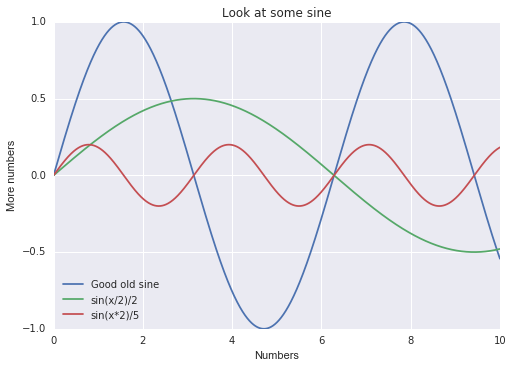

In [6]:
plt.plot(xs, ys1, label='Good old sine')
plt.plot(xs, ys2, label='sin(x/2)/2')
plt.plot(xs, ys3, label='sin(x*2)/5')

plt.xlabel("Numbers")
plt.ylabel("More numbers")
plt.title("Look at some sine")

plt.legend(loc=0)
plt.show()

Somtimes I forget how much just importing seaborn can help. An improvement over the original, but what's changed?


In [7]:
any_rc_changes(mpl.rcParams.copy())

ytick.major.width:
	Old param:0.5
	New param:1.0

grid.linestyle:
	Old param::
	New param:-

text.color:
	Old param:k
	New param:.15

lines.markeredgewidth:
	Old param:0.5
	New param:0.0

xtick.labelsize:
	Old param:medium
	New param:10.0

axes.titlesize:
	Old param:large
	New param:12.0

patch.linewidth:
	Old param:1.0
	New param:0.3

legend.frameon:
	Old param:True
	New param:False

xtick.major.size:
	Old param:4.0
	New param:0.0

ytick.direction:
	Old param:in
	New param:out

xtick.major.width:
	Old param:0.5
	New param:1.0

grid.color:
	Old param:k
	New param:white

ytick.major.pad:
	Old param:4.0
	New param:7.0

ytick.labelsize:
	Old param:medium
	New param:10.0

axes.linewidth:
	Old param:1.0
	New param:0.0

figure.facecolor:
	Old param:(1, 1, 1, 0)
	New param:white

image.cmap:
	Old param:jet
	New param:Greys

figure.figsize:
	Old param:[6.0, 4.0]
	New param:[8.0, 5.5]

xtick.minor.size:
	Old param:2.0
	New param:0.0

lines.linewidth:
	Old param:1.0
	New param:1.75

legend.numpo

In [8]:
num_rc_changes(mpl.rcParams.copy())

42

You apparently need only 42 changes to make matplotlib decently presentable. 

Coincidence?

### Seaborn with Statements ###
How about with one of the fancy with statements:

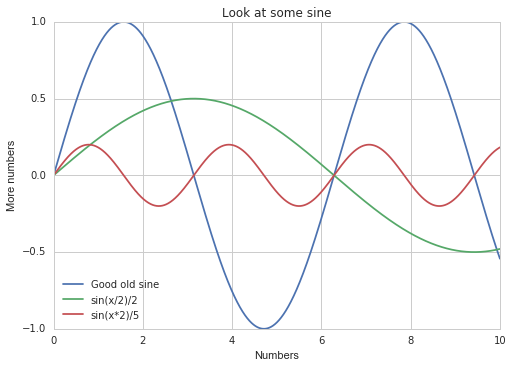

In [9]:
with sns.axes_style('whitegrid'):
    plt.plot(xs, ys1, label='Good old sine')
    plt.plot(xs, ys2, label='sin(x/2)/2')
    plt.plot(xs, ys3, label='sin(x*2)/5')

    plt.xlabel("Numbers")
    plt.ylabel("More numbers")
    plt.title("Look at some sine")

    plt.legend(loc=0)
    plt.show()
    
    in_with_rc = mpl.rcParams.copy()
    
out_of_with_rc = mpl.rcParams.copy()

Differences between the seaborn-default rc and the in-the-loop rc:

In [10]:
any_rc_changes(in_with_rc, seaborn_default_rc)

grid.color:
	Old param:white
	New param:.8

axes.linewidth:
	Old param:0.0
	New param:1.0

axes.facecolor:
	Old param:#EAEAF2
	New param:white

axes.edgecolor:
	Old param:white
	New param:.8



Any changes from the default after we leave the loop?

In [11]:
any_rc_changes(out_of_with_rc, seaborn_default_rc)

Apparently not, which we can confirm with a quick visual check ourselves:

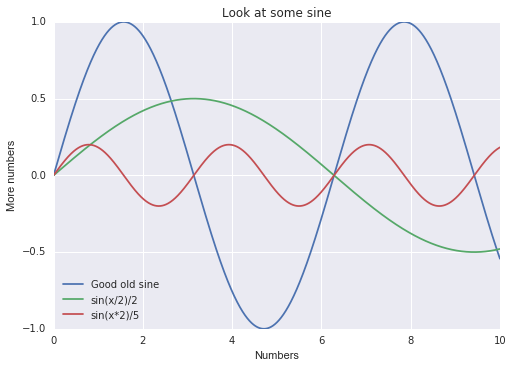

In [12]:
plt.plot(xs, ys1, label='Good old sine')
plt.plot(xs, ys2, label='sin(x/2)/2')
plt.plot(xs, ys3, label='sin(x*2)/5')

plt.xlabel("Numbers")
plt.ylabel("More numbers")
plt.title("Look at some sine")

plt.legend(loc=0)
plt.show()

### How about Pandas graphing? ###
No idea! Let's take a quick look

In [13]:
right_before_pandas_rc = mpl.rcParams.copy()
import pandas as pd
any_rc_changes(mpl.rcParams.copy(), right_before_pandas_rc)

In [14]:
df = pd.DataFrame.from_dict({'xs' : xs,
                             'ys1': ys1,
                             'ys2': ys2,
                             'ys3': ys3})

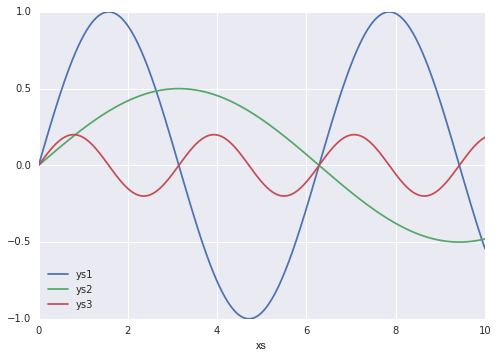

In [22]:
df.plot(x='xs')
plt.show()

Cool cool cool. Looks like it inherits Seaborns defaults. 

Quick test of this, if it is taking the kind of vaguly global defaults, then is should change within a seaborn `with`:

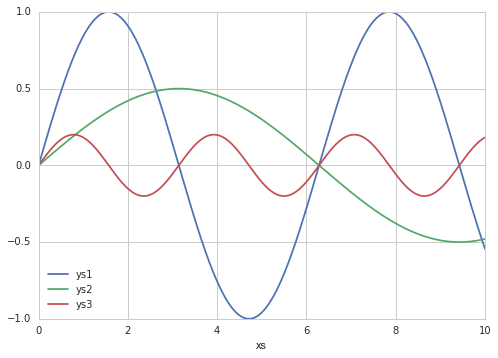

In [24]:
with sns.axes_style('whitegrid'):
    df.plot(x='xs')
    plt.show()

And it does! Cool. Learning stuff. 

Seams like for yellowbrick, we should just directly fight with Seaborn and wrest style control from them, borrowing their various stlye setting functions.